In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

## Hierarchical Clustering (Agglomerative)

In [2]:
### Continued Example: App Usage Data

age = [20, 22, 24, 24, 25, 28, 29, 34, 36, 38, 39, 41, 42, 44, 56, 57, 61, 62, 63, 63]
hours = [12, 10, 11.2, 12.3, 12.4, 13.5, 14, 8, 7, 6, 7.2, 5.6, 6.7, 6.2, 5, 4.2, 3, 2, 1]
df = pd.DataFrame(zip(age, hours), columns = ['age', 'hours'])
df.head()

,age,hours
0,20,12.0
1,22,10.0
2,24,11.2
3,24,12.3
4,25,12.4


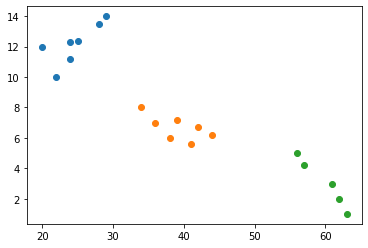

In [3]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)

# fit model and predict clusters fit and the predict at the same time or one after another
df['clusters'] = model.fit_predict(df)
# create scatter plot for samples from each cluster
clusterval = df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(df[df['clusters']==cluster]['age'], df[df['clusters']==cluster]['hours'])
plt.show()

In [5]:
df

,age,hours,clusters
0,20,12.0,2
1,22,10.0,2
2,24,11.2,2
3,24,12.3,2
4,25,12.4,2
5,28,13.5,2
6,29,14.0,2
7,34,8.0,0
8,36,7.0,0
9,38,6.0,0


In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
help(dendrogram)
help(linkage)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children. The top of the U-link indicates a
    cluster merge. The two legs of the U-link indicate which clusters
    were merged. The length of the two legs of the U-link represents
    the distance between the child clusters. It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
        Th

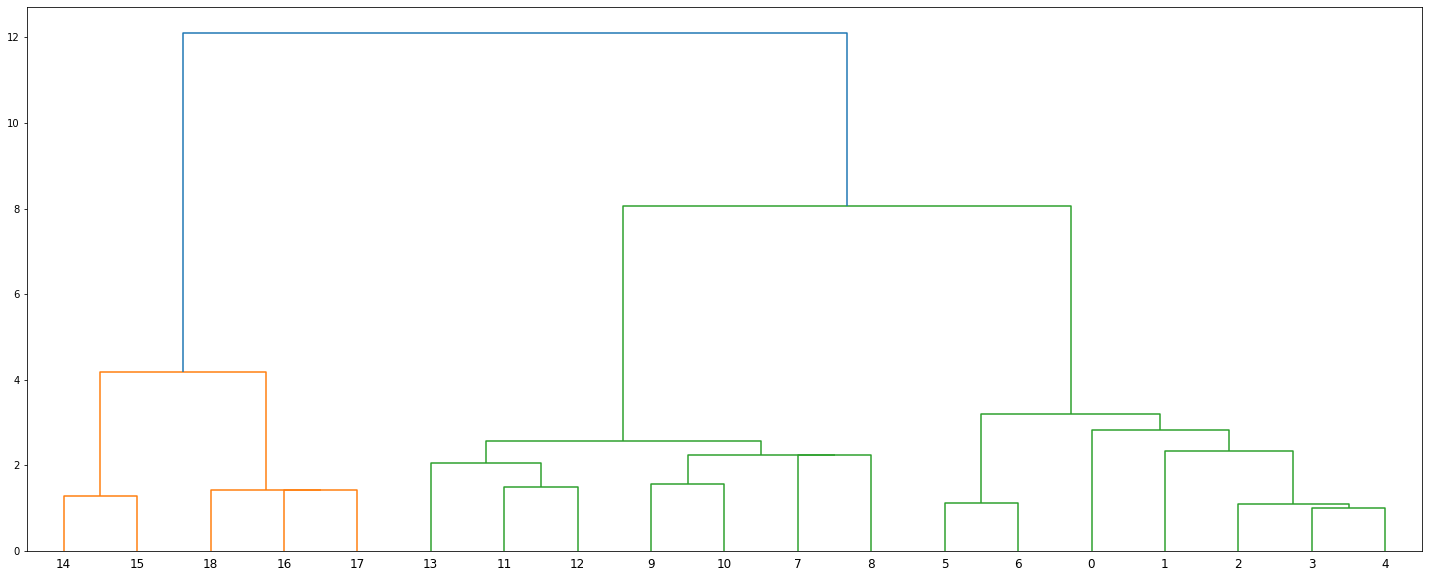

In [6]:
Z = linkage(df)
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

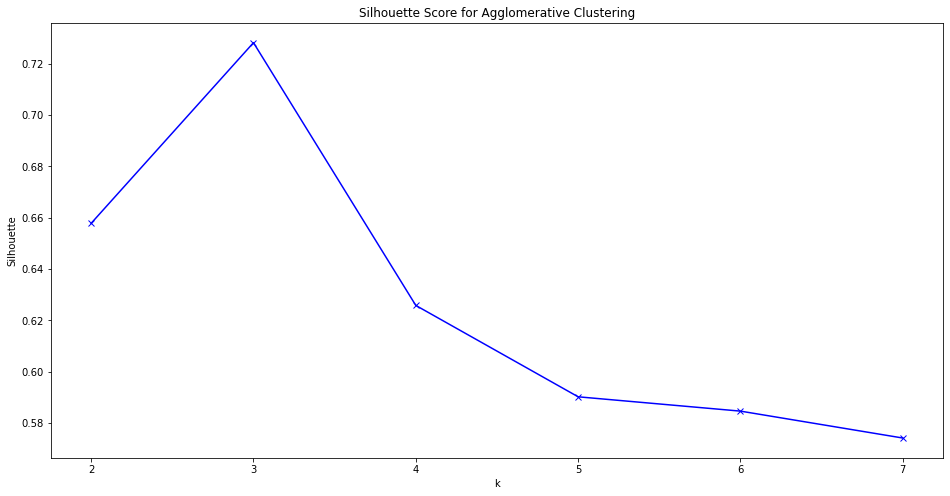

In [8]:
K = range(2, 8)
silhouette = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(df)
    silhouette.append(silhouette_score(df, model.fit_predict(df)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

## Example with generated data

In [9]:
from sklearn.datasets import make_classification
help(make_classification)

Help on function make_classification in module sklearn.datasets._samples_generator:

make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
    Generate a random n-class classification problem.
    
    This initially creates clusters of points normally distributed (std=1)
    about vertices of an ``n_informative``-dimensional hypercube with sides of
    length ``2*class_sep`` and assigns an equal number of clusters to each
    class. It introduces interdependence between these features and adds
    various types of further noise to the data.
    
    Without shuffling, ``X`` horizontally stacks features in the following
    order: the primary ``n_informative`` features, followed by ``n_redundant``
    linear combinations of the informative features, followed by ``n_repeated``
    duplicates, dr

In [10]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

pd.DataFrame(X).describe()

,0,1
count,1000.000000,1000.000000
mean,-0.000778,-0.971083
std,1.157922,1.109568
min,-2.933792,-4.887411
25%,-1.041307,-1.686809
50%,0.163985,-0.986916
75%,1.015676,-0.258486
max,2.350330,3.981227


## K-Means

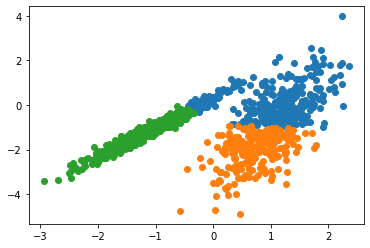

In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state = 1234)
model.fit(X)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

Text(0.5, 1.0, 'Silhouette Score for KMeans')

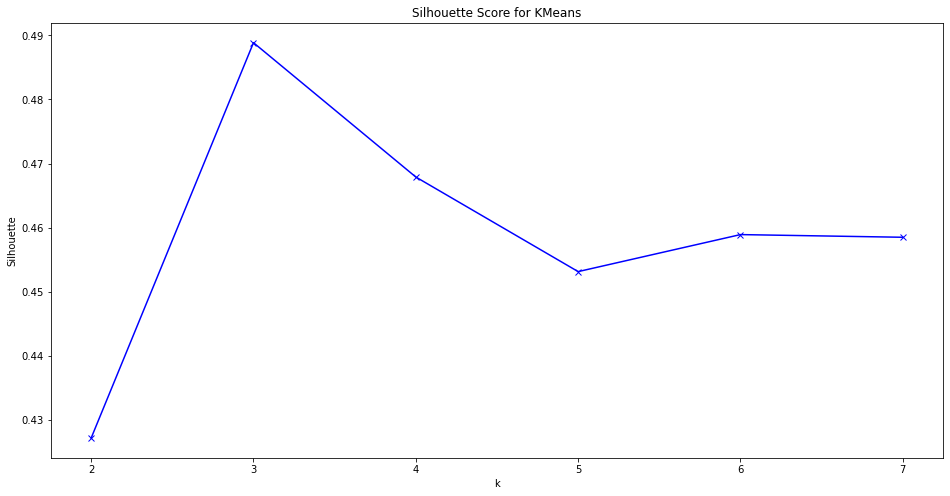

In [13]:
K = range(2, 8)
silhouette_kmeans = []

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    silhouette_kmeans.append(silhouette_score(X, model.fit_predict(X)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_kmeans, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for KMeans')

## Hierarchical Clustering (Agglomerative)

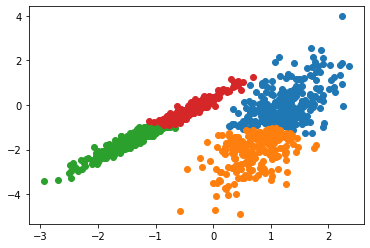

In [17]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

Text(0.5, 1.0, 'Silhouette Score for Agglomerative Clustering')

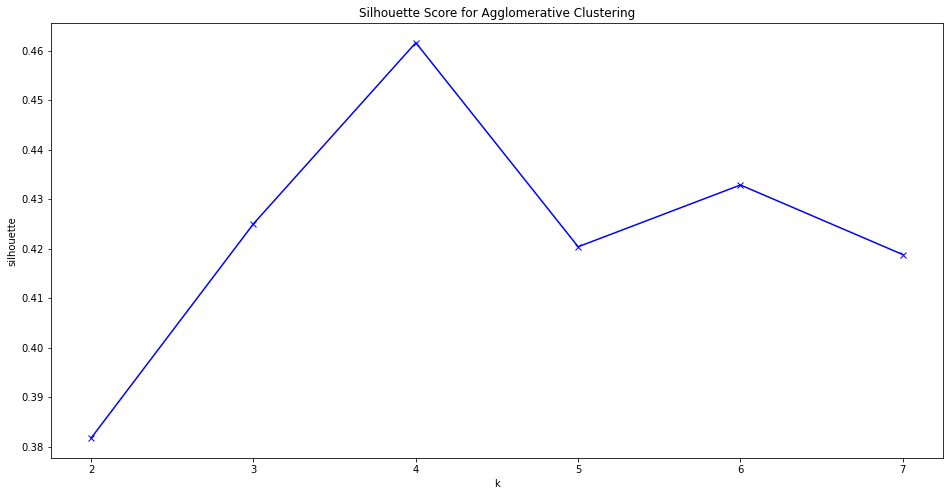

In [23]:
K = range(2, 8)
silhouette_hc = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X)
    silhouette_hc.append(silhouette_score(X, model.fit_predict(X)))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_hc, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

## DBSCAN

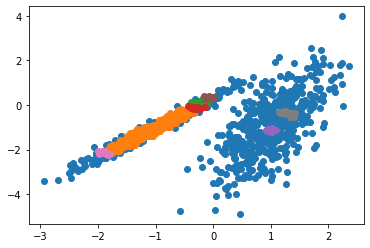

In [24]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.1, min_samples=10)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

In [ ]:
eps = [0.1]
silhouette_dbs = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X)
    silhouette_dbs.append(silhouette_score(X, model.fit_predict(X)))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_dbs, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for DBSCAN')

## Evaluating Unsupervised Learning Algorithms

In most cases, we do not have a source of truth!

In [ ]:
print('Silhoutte Score for KMeans')
print(silhouette_kmeans)
print('Silhoutte Score for Agglomerative Clustering')
print(silhouette_hc)
print('Silhoutte Score for DBSCAN')
print(silhouette_dbs)